In [121]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [122]:
train_ds, test_ds = tfds.load('imdb_reviews', split=['train', 'test'],as_supervised=True)

print(train_ds)
print(test_ds)

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>
<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>


In [123]:
for example, label in train_ds.take(1):
  print('Example: ', example)
  print('Label: ', label)

Example:  tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
Label:  tf.Tensor(0, shape=(), dtype=int64)


In [126]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for example,label in train_ds:
  training_sentences.append(example.numpy().decode('utf8'))
  training_labels.append(label.numpy())
  
for example,label in test_ds:
  testing_sentences.append(example.numpy().decode('utf8'))
  testing_labels.append(label.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [113]:
import random
i = random.randint(0, len(train_data))

print(train_data[i])
print(train_labels[i])

The comparison to Sleuth, the earlier stage-play-turned-film, is obvious and upon my first viewing I too thought Sleuth was better, but Deathtrap has, at least for me, many more repeat viewings in it than Sleuth.<br /><br />I purchased Deathrap in the bargain bin at Wal-Mart, figuring that it had Caine and the underrated Reeve and was worth the 6 bucks. It was one of the finest DVD purchases I could've picked up.<br /><br />It's one of those best-kept-secrets that movie buffs always are always delighted to discover. And it's totally worth repeat viewings.<br /><br />Though Laurence Olivier and Michael Caine turned in bravado performances in Sleuth, I was doubly impressed with Christopher Reeve as Clifford Anderson. Reeve, rightfully associated with his now legendary portrayal of Superman, stole the show in what should've been an Oscar worthy performance. I've always felt Reeve was a type-cast actor who didn't get much of a chance to shine outside of the Superman films and a few other f

In [127]:
vocab_size = 10000
embedding_dim = 16
max_length = 150
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
tokenizer.fit_on_texts(testing_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

In [128]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(training_sequences, 
                                                           maxlen=MAX_LENGTH,
                                                           padding='post')

test_data = tf.keras.preprocessing.sequence.pad_sequences(testing_sequences,
                                                          maxlen=MAX_LENGTH,
                                                          padding='post')

print(train_data[0])
print(test_data[0])

[  12   14   33  420  382   18   90   27    1    9   32 1460 4087   39
  499    1  196   24   79  151   19   12  207  331   27   66  247  215
    9  485   58   66   79  114   99   22 5800   12 1381  647  774   12
   18    7   33  405 9016  177 2328  413    2   89 1152  135   71  144
   51    2    1 6553   71  233   66 3097   16    1 3150    1    1 1531
 4680    3   41 3805  113 1505   17 4087   14  162   19    4 1152  888
 9017    9    4   18   13   14 3855    5  100  145 1159   11  236  681
   13   47   24   98   38   12 8162 5238   38 1460    1   50  390   11
   99 1184  847  141   10    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [129]:
print(type(train_data))
print(type(train_labels))
print(type(test_data))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [130]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.97):
      print('97% accuracy reached, stopping training')
      self.model.stop_training = True

callback=Callback()

In [134]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels),
                    batch_size=32)

Epoch 1/10


782/782 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5244WARNING:tensorflow:Model was constructed with shape (None, 150) for input KerasTensor(type_spec=TensorSpec(shape=(None, 150), dtype=tf.float32, name='embedding_9_input'), name='embedding_9_input', description="created by layer 'embedding_9_input'"), but it was called on an input with incompatible shape (None, 256).


782/782 [==============================] - 359s 452ms/step - loss: 0.6907 - accuracy: 0.5244 - val_loss: 0.6885 - val_accuracy: 0.5296
Epoch 2/10
782/782 [==============================] - 357s 456ms/step - loss: 0.6784 - accuracy: 0.5690 - val_loss: 0.6642 - val_accuracy: 0.5913
Epoch 3/10
782/782 [==============================] - 348s 445ms/step - loss: 0.6378 - accuracy: 0.6180 - val_loss: 0.5998 - val_accuracy: 0.6206
Epoch 4/10
782/782 [==============================] - 360s 460ms/step - loss: 0.5992 - accuracy: 0.6298 - val_loss: 0.4785 - val_accuracy: 0.8034
Epoch 5/10
782/782 [==============================] - 352s 450ms/step - loss: 0.3280 - accuracy: 0.8664 - val_loss: 0.3273 - val_accuracy: 0.8649
Epoch 6/10
782/782 [==============================] - 361s 462ms/step - loss: 0.2156 - accuracy: 0.9190 - val_loss: 0.3440 - val_accuracy: 0.8641
Epoch 7/10
782/782 [==============================] - 348s 445ms/step - loss: 0.1657 - accuracy: 0.9395 - val_loss: 0.3879 - val_accura

In [157]:
def plot(history, metric):
  plt.plot(history.history[metric], label=metric)
  plt.plot(history.history['val_'+metric], label='validation')
  plt.title('model performance')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend()

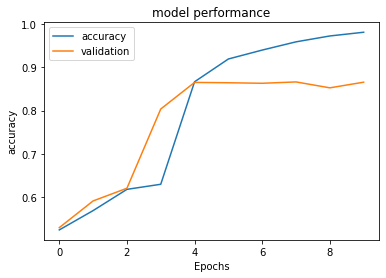

In [158]:
plot(history=history, metric='accuracy')

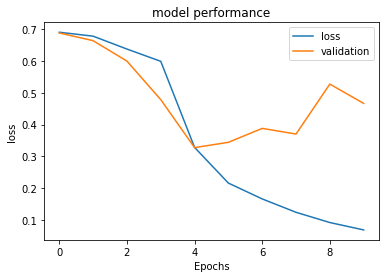

In [159]:
plot(history=history, metric='loss')

In [227]:
new_review = ['this movie is not worth seeing. It was terrible in every way']

In [228]:
new_reviews_list = [['this movie is not worth seeing. It was terrible in every way'],
                    ['the moview was great'],
                    ['the film was alright i guess. the actors were cool'],
                    ['the movie wasnt as good as the book']]
new_reviews_labels = [0, 1, 1, 0]

In [238]:
def predict(review, label):
  tokenizer.fit_on_texts(review)
  review_sequence = tokenizer.texts_to_sequences(review)
  padded_review = tf.keras.preprocessing.sequence.pad_sequences(review_sequence)
  prediction = model.predict(padded_review)

  if prediction < 0.5:
    prediction = 0
  else:
    prediction = 1

  print('pridiction: ', prediction)
  print('Review: ', review)
  print('Label: ', label)

  if prediction - label == 0:
    print('Correct!')
  else:
    print('Incorrect!')

i = random.randint(0, len(new_reviews_list) - 1)
predict(review=new_reviews_list[i], label=new_reviews_labels[i])

pridiction:  1
Review:  ['the moview was great']
Label:  1
Correct!
